In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [168]:
data_file = "conso.txt"

In [169]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [170]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [171]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


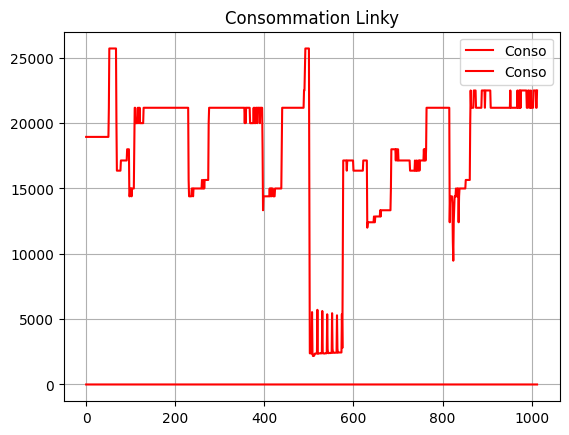

In [172]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [173]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [174]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73359 entries, 0 to 73358
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  73359 non-null  int64  
 1   kWh       73359 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [175]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
73354,26250,0.14
73355,26331,0.14
73356,26319,0.14
73357,24731,0.14


In [176]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
73354,26250,0.14,26.250,137.142857,1764431104
73355,26331,0.14,26.331,136.720975,1764457435
73356,26319,0.14,26.319,136.783312,1764483754
73357,24731,0.14,24.731,145.566293,1764508485


In [177]:
# index dernier echantillon
l=len(conso_data)-1
l

73358

In [178]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1764532802000

In [179]:
old

False

In [180]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 28, 29, 377359)

In [181]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73359 entries, 0 to 73358
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   73359 non-null  int64         
 1   kWh        73359 non-null  float64       
 2   sec        73359 non-null  float64       
 3   Wh         73359 non-null  float64       
 4   cumul(ms)  73359 non-null  int64         
 5   dates      73359 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.4 MB


In [182]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:28:55.666359,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:29:21.909359,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:29:47.794359,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:30:13.548359,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:30:39.322359,07/03/2024
...,...,...,...,...,...,...,...
73354,26250,0.14,26.250,137.142857,1764431104,2024-03-27 10:35:40.481359,27/03/2024
73355,26331,0.14,26.331,136.720975,1764457435,2024-03-27 10:36:06.812359,27/03/2024
73356,26319,0.14,26.319,136.783312,1764483754,2024-03-27 10:36:33.131359,27/03/2024
73357,24731,0.14,24.731,145.566293,1764508485,2024-03-27 10:36:57.862359,27/03/2024


In [183]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:28:55.666359   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh   cumul(ms)  \
 73358     24317  0.15  24.317  148.044578  1764532802   
 
                            dates        days  
 73358 2024-03-27 10:37:22.179359  27/03/2024  )

In [184]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'27/03/2024'

In [185]:
month, year

(3, 2024)

In [186]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour



In [187]:
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:prefd='0'
    else:prefd=''
    if month<10:prefm='0'
    else:prefm=''
    day = f'{prefd}{d}/{prefm}{month}/{year}'
    conso_graph.append((day,conso_by_day(day)))
    #print(day,conso_by_day(day))
conso_df = pd.DataFrame(conso_graph, columns=('day','conso'))
conso_df.set_index('day',inplace=True)
conso_df

,conso
day,
07/03/2024,3.329
08/03/2024,3.763
09/03/2024,3.059
10/03/2024,3.569
11/03/2024,4.527
12/03/2024,3.550
13/03/2024,3.508
14/03/2024,3.703
15/03/2024,3.545


In [188]:

mean = conso_df['conso'].mean()
mean

3.4932857142857148

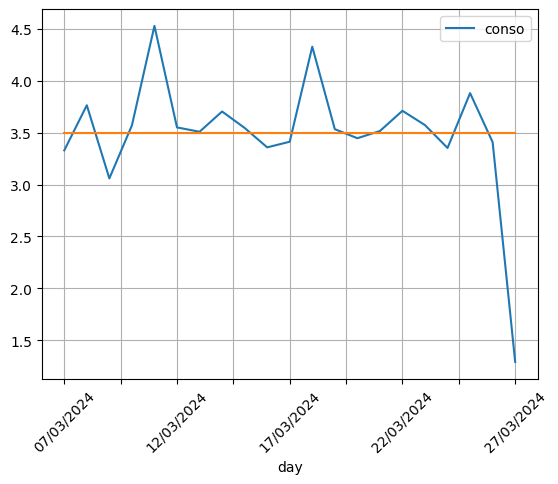

In [189]:
conso_df.plot()
plt.plot()
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [190]:
#manuel
#day = '25/03/2024'


In [191]:
# conso day
conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

1293

In [192]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_12632\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:23,32292,0.11,32.292,111.482720,1726314200,2024-03-27 00:00:23.577359,27/03/2024
0:0:55,32148,0.11,32.148,111.982083,1726346348,2024-03-27 00:00:55.725359,27/03/2024
0:1:28,33257,0.11,33.257,108.247888,1726379605,2024-03-27 00:01:28.982359,27/03/2024
0:2:2,33700,0.11,33.700,106.824926,1726413305,2024-03-27 00:02:02.682359,27/03/2024
0:2:36,33609,0.11,33.609,107.114166,1726446914,2024-03-27 00:02:36.291359,27/03/2024
...,...,...,...,...,...,...,...
10:35:40,26250,0.14,26.250,137.142857,1764431104,2024-03-27 10:35:40.481359,27/03/2024
10:36:6,26331,0.14,26.331,136.720975,1764457435,2024-03-27 10:36:06.812359,27/03/2024
10:36:33,26319,0.14,26.319,136.783312,1764483754,2024-03-27 10:36:33.131359,27/03/2024


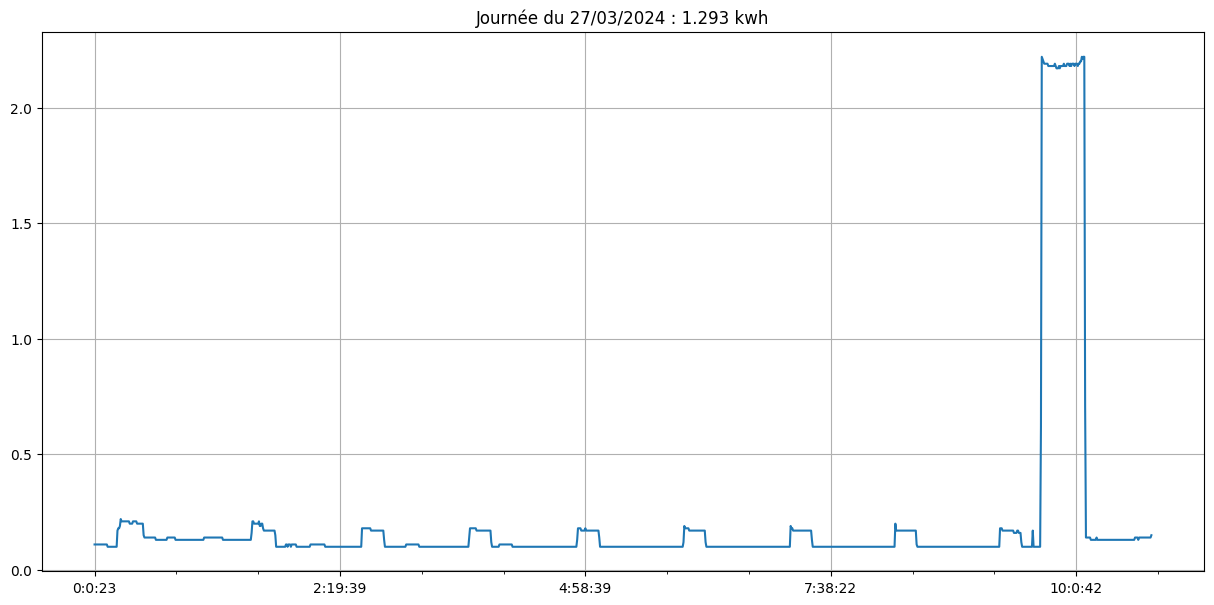

In [193]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

55

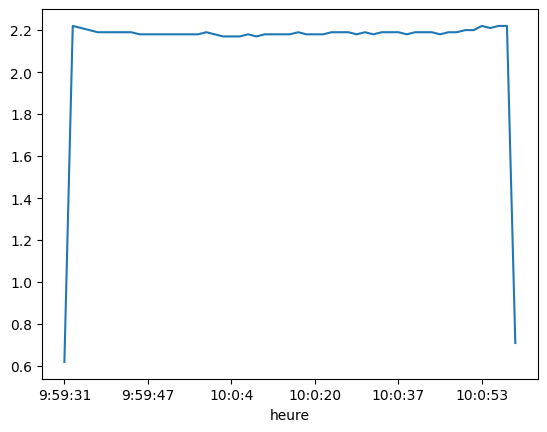

In [194]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

546

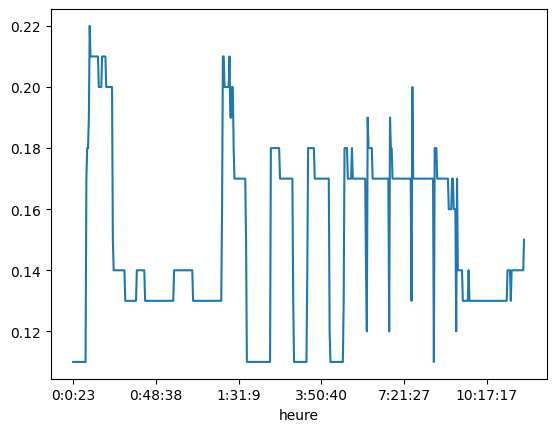

In [195]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1238

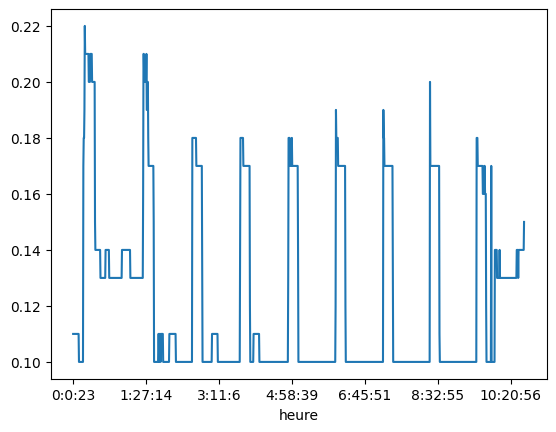

In [196]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [197]:
time = conso_data['dates']
time


0       2024-03-07 00:28:55.666359
1       2024-03-07 00:29:21.909359
2       2024-03-07 00:29:47.794359
3       2024-03-07 00:30:13.548359
4       2024-03-07 00:30:39.322359
                   ...            
73354   2024-03-27 10:35:40.481359
73355   2024-03-27 10:36:06.812359
73356   2024-03-27 10:36:33.131359
73357   2024-03-27 10:36:57.862359
73358   2024-03-27 10:37:22.179359
Name: dates, Length: 73359, dtype: datetime64[ns]

In [198]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [199]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [200]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

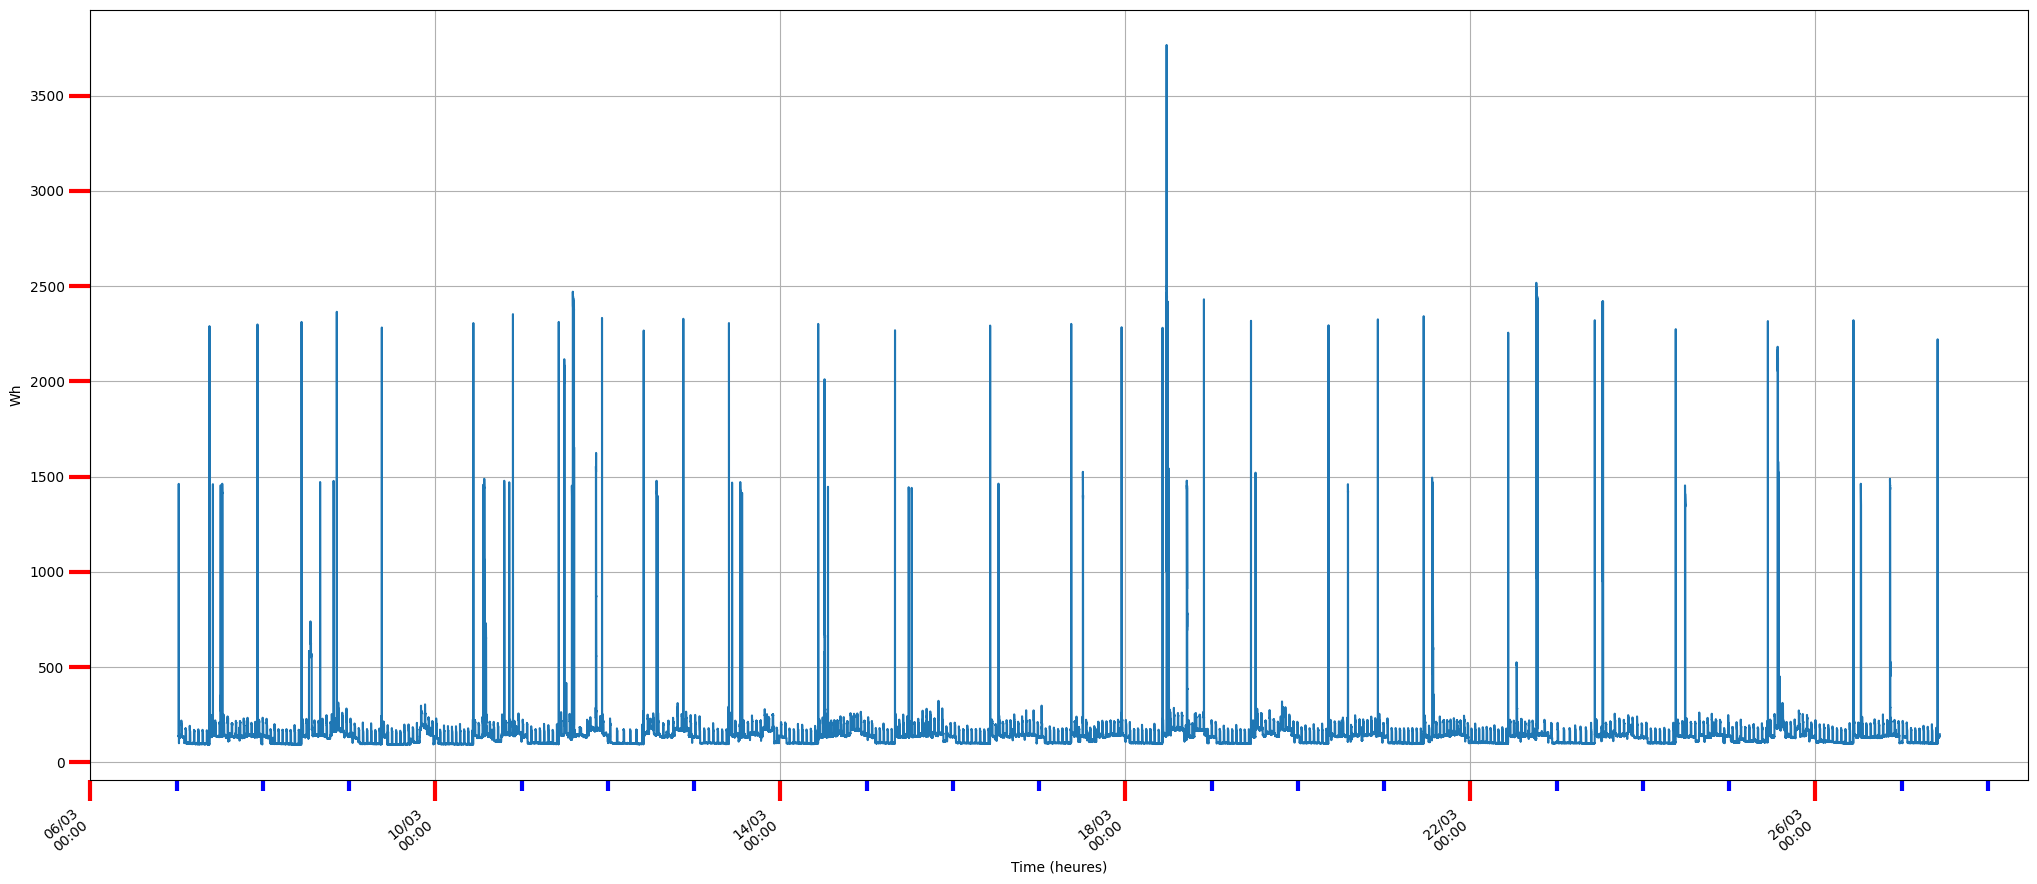

In [201]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [202]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
73358,24317,0.15,24.317,148.044578,1764532802,2024-03-27 10:37:22.179359,27/03/2024


In [203]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1764532802000

# Slice of last 1 kWh

In [204]:
l = len(conso_data)  # total watt consommés
l

73359

In [205]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(73359, 1000)

In [206]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [207]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 72359     35734  0.10  35.734  100.744389  1734420918   
 72360     35721  0.10  35.721  100.781053  1734456639   
 72361     35537  0.10  35.537  101.302867  1734492176   
 72362     35564  0.10  35.564  101.225959  1734527740   
 72363     35501  0.10  35.501  101.405594  1734563241   
 ...         ...   ...     ...         ...         ...   
 73354     26250  0.14  26.250  137.142857  1764431104   
 73355     26331  0.14  26.331  136.720975  1764457435   
 73356     26319  0.14  26.319  136.783312  1764483754   
 73357     24731  0.14  24.731  145.566293  1764508485   
 73358     24317  0.15  24.317  148.044578  1764532802   
 
                            dates        days  
 72359 2024-03-27 02:15:30.295359  27/03/2024  
 72360 2024-03-27 02:16:06.016359  27/03/2024  
 72361 2024-03-27 02:16:41.553359  27/03/2024  
 72362 2024-03-27 02:17:17.117359  27/03/2024  
 72363 2024-03-27 02:17:52.618359  27/03/2024  
 ...   

In [208]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [209]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [210]:
cumtime_end,cumtime_start

(1764532802000, 1734456639000)

In [211]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

30076163000

In [212]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 27, 10, 37, 29, 283342),
 datetime.datetime(2024, 3, 27, 2, 16, 13, 120342),
 '27/03/2024 10:37:22')

In [213]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:28:55.666359,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:29:21.909359,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:29:47.794359,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:30:13.548359,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:30:39.322359,07/03/2024
...,...,...,...,...,...,...,...
73354,26250,0.14,26.250,137.142857,1764431104,2024-03-27 10:35:40.481359,27/03/2024
73355,26331,0.14,26.331,136.720975,1764457435,2024-03-27 10:36:06.812359,27/03/2024
73356,26319,0.14,26.319,136.783312,1764483754,2024-03-27 10:36:33.131359,27/03/2024
73357,24731,0.14,24.731,145.566293,1764508485,2024-03-27 10:36:57.862359,27/03/2024


In [214]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('27/03/2024 02:16:06', '27/03/2024 10:37:22')

In [215]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-27 02:15:30.295359', '2024-03-27 10:37:22.179359')

In [216]:
k

1

In [217]:
data.Interval.tail(1000)

72359    35734
72360    35721
72361    35537
72362    35564
72363    35501
         ...  
73354    26250
73355    26331
73356    26319
73357    24731
73358    24317
Name: Interval, Length: 1000, dtype: int64

In [218]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.374338333333334, 2.8658980619961416, 8, 22, 27)

In [219]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_12632\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [220]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
72359,35734,0.10,35.734,100.744389,1734420918,2024-03-27 02:15:30.295359,27/03/2024,2024-03-27 02:15:30.295359
72360,35721,0.10,35.721,100.781053,1734456639,2024-03-27 02:16:06.016359,27/03/2024,2024-03-27 02:16:06.016359
72361,35537,0.10,35.537,101.302867,1734492176,2024-03-27 02:16:41.553359,27/03/2024,2024-03-27 02:16:41.553359
72362,35564,0.10,35.564,101.225959,1734527740,2024-03-27 02:17:17.117359,27/03/2024,2024-03-27 02:17:17.117359
72363,35501,0.10,35.501,101.405594,1734563241,2024-03-27 02:17:52.618359,27/03/2024,2024-03-27 02:17:52.618359
...,...,...,...,...,...,...,...,...
73354,26250,0.14,26.250,137.142857,1764431104,2024-03-27 10:35:40.481359,27/03/2024,2024-03-27 10:35:40.481359
73355,26331,0.14,26.331,136.720975,1764457435,2024-03-27 10:36:06.812359,27/03/2024,2024-03-27 10:36:06.812359
73356,26319,0.14,26.319,136.783312,1764483754,2024-03-27 10:36:33.131359,27/03/2024,2024-03-27 10:36:33.131359
73357,24731,0.14,24.731,145.566293,1764508485,2024-03-27 10:36:57.862359,27/03/2024,2024-03-27 10:36:57.862359


<Axes: >

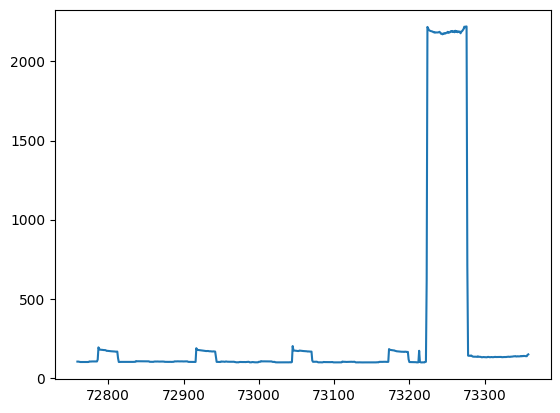

In [221]:
data.tail(600)['Wh'].plot()

In [222]:
data['Wh']

72359    100.744389
72360    100.781053
72361    101.302867
72362    101.225959
72363    101.405594
            ...    
73354    137.142857
73355    136.720975
73356    136.783312
73357    145.566293
73358    148.044578
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

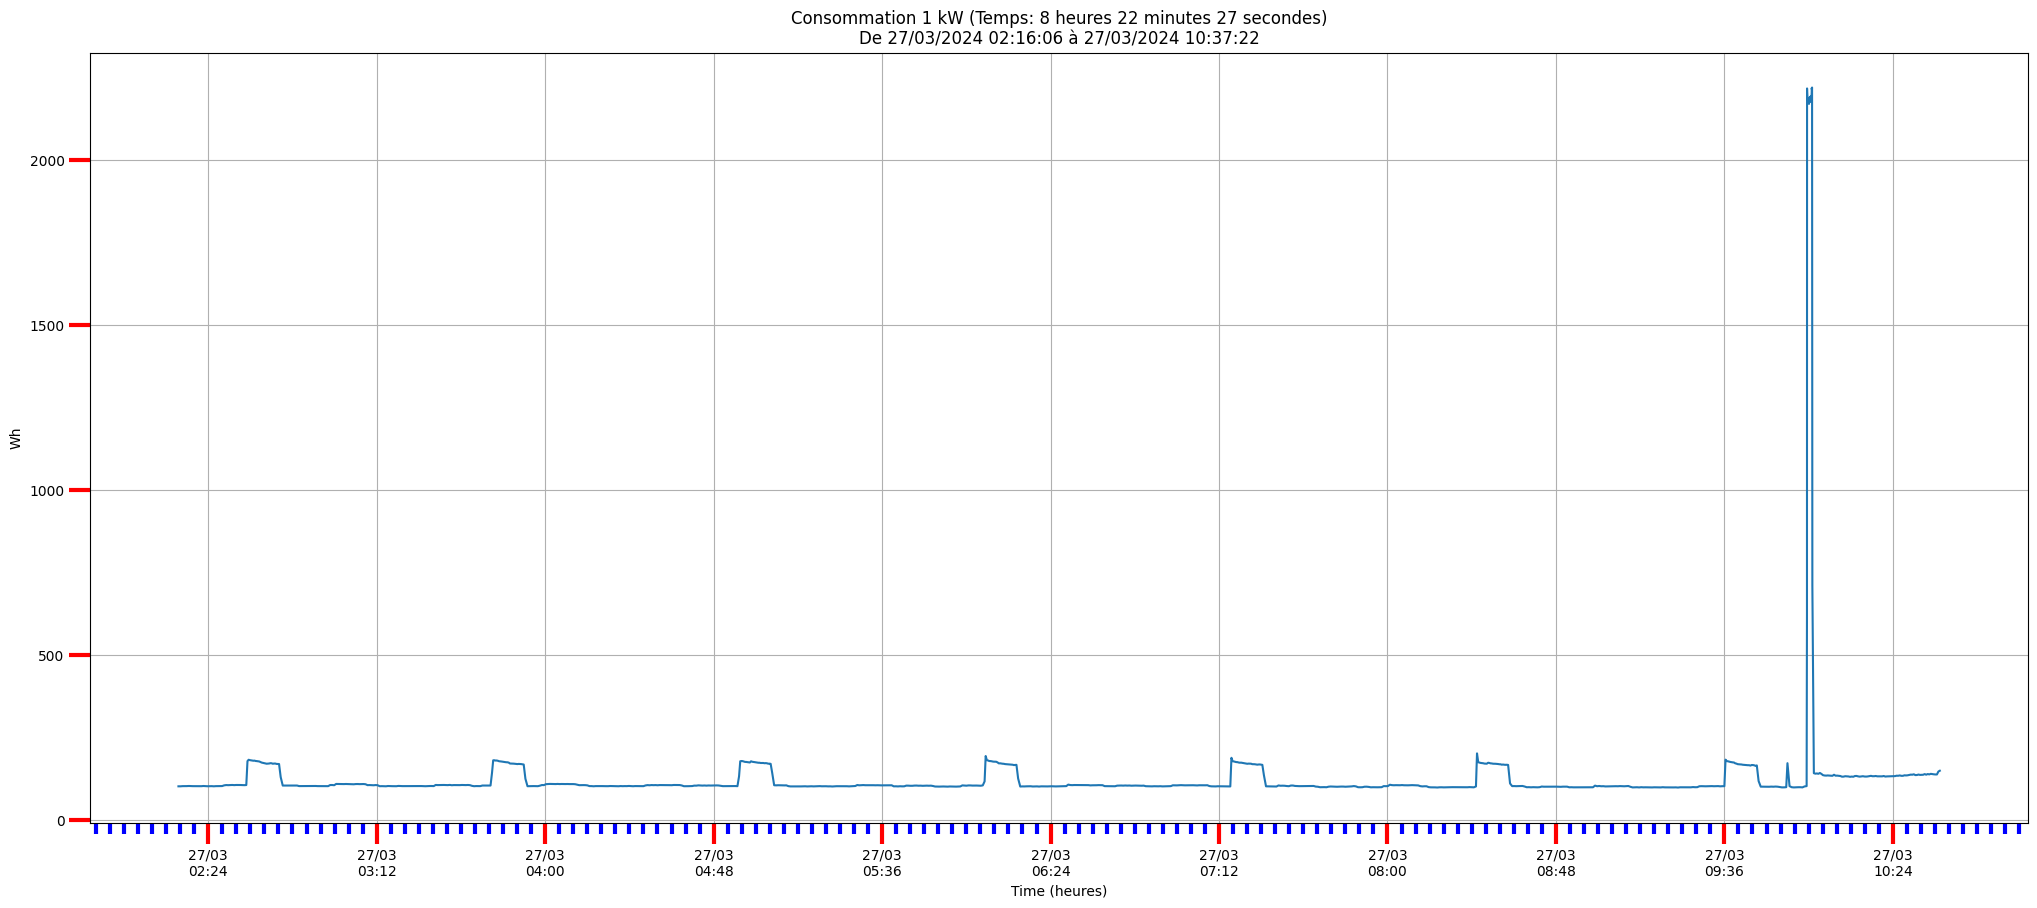

In [223]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

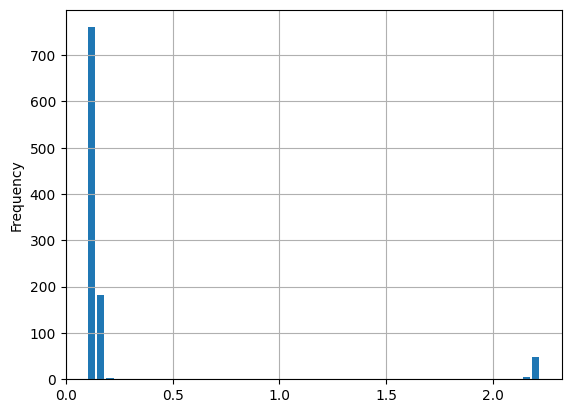

In [224]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [225]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
73354,26250,0.14,26.250,137.142857,1764431104,2024-03-27 10:35:40.481359,27/03/2024
73355,26331,0.14,26.331,136.720975,1764457435,2024-03-27 10:36:06.812359,27/03/2024
73356,26319,0.14,26.319,136.783312,1764483754,2024-03-27 10:36:33.131359,27/03/2024
73357,24731,0.14,24.731,145.566293,1764508485,2024-03-27 10:36:57.862359,27/03/2024
73358,24317,0.15,24.317,148.044578,1764532802,2024-03-27 10:37:22.179359,27/03/2024


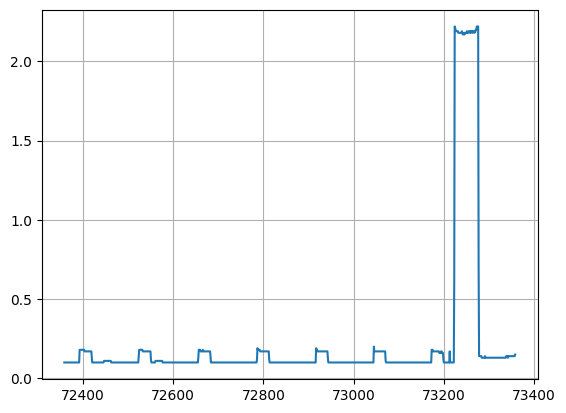

In [226]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [227]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1764532802000.0, 29408.880033333335)

In [228]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 27, 10, 37, 33, 663424),
 datetime.datetime(2024, 3, 7, 0, 28, 40, 861424))

In [229]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(73359, 1764533, 490.1480555555556)

In [230]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [231]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [232]:
732/12 # 60 jours

61.0

In [233]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

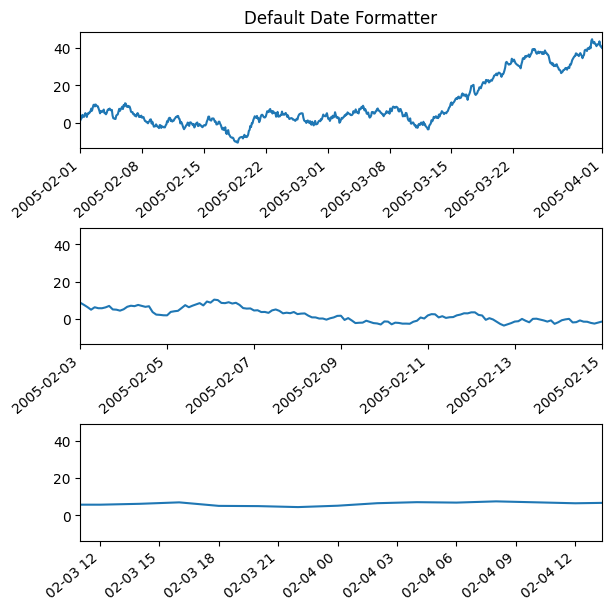

In [234]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [235]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)